Handling imports.

In [1]:
import scipy.io as spio
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras import layers
from keras.optimizers import Adagrad, Adam

Using TensorFlow backend.


In [23]:
train_data = np.empty((1990,2000,13))
train_label = np.empty((1990))

In [24]:
for i in range(1,11):
    mat = spio.loadmat('S0{}A.mat'.format(i))
    data = mat['data']
    datapoints_x_channels = data[0][0][0]
    # normalizing the data
    mean = datapoints_x_channels.mean()
    datapoints_x_channels -= mean
    std = datapoints_x_channels.std()
    datapoints_x_channels /= std
    true_label = (data[0][0][1])[0:199]
    array_trial = (data[0][0][2]).reshape(200)[0:199]
    for j , rows in enumerate(array_trial):
        indices = range(array_trial[j]+2500, array_trial[j]+4500)
        train_data[j+ 199*(i-1)] = datapoints_x_channels[indices]
        train_label[j+199*(i-1)] = true_label[j]

In [25]:
train_label = np_utils.to_categorical(train_label)

In [26]:
model = Sequential()
model.add(layers.GRU(24,
                     activation='relu',
                     input_shape=train_data.shape[1:],
                     return_sequences=True))
model.add(layers.SimpleRNN(32, 
                       activation='relu',
                      return_sequences=True))

model.add(layers.GRU(32,
                      activation='relu',
                      return_sequences=True))
model.add(layers.SimpleRNN(16, 
                           activation='relu',
                          ))
model.add(layers.Dense(3, activation='sigmoid'))
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 2000, 24)          2736      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 2000, 32)          1824      
_________________________________________________________________
gru_2 (GRU)                  (None, 2000, 32)          6240      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 11,635
Trainable params: 11,635
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(train_data,train_label,epochs=50,
                   batch_size =256,
                    validation_split=0.25)

Train on 1492 samples, validate on 498 samples
Epoch 1/50
1492/1492 [==============================] - 33s 22ms/step - loss: 0.5287 - acc: 0.6667 - val_loss: 0.5297 - val_acc: 0.6673
Epoch 2/50
1492/1492 [==============================] - 29s 19ms/step - loss: 0.5014 - acc: 0.6667 - val_loss: 0.5226 - val_acc: 0.6667
Epoch 3/50
1492/1492 [==============================] - 30s 20ms/step - loss: 0.4878 - acc: 0.6676 - val_loss: 0.4832 - val_acc: 0.6700
Epoch 4/50
1492/1492 [==============================] - 33s 22ms/step - loss: 0.4765 - acc: 0.6687 - val_loss: 0.4742 - val_acc: 0.6613
Epoch 5/50
1492/1492 [==============================] - 34s 23ms/step - loss: 0.4691 - acc: 0.6716 - val_loss: 0.4725 - val_acc: 0.6593
Epoch 6/50
1492/1492 [==============================] - 30s 20ms/step - loss: 0.4690 - acc: 0.6714 - val_loss: 0.4686 - val_acc: 0.6560
Epoch 7/50
1492/1492 [==============================] - 32s 22ms/step - loss: 0.4640 - acc: 0.6747 - val_loss: 0.4664 - val_acc: 0.6613
E

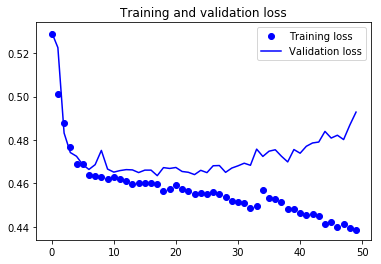

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

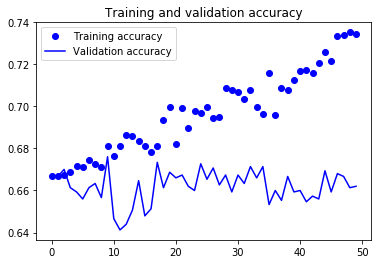

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()


In [32]:
mat2 = spio.loadmat('S01B.mat')
data2 = mat2['data']
datapoints_x_channels2 = data2[0][0][0]
test_label = (data2[0][0][1])[0:199]
test_label = np_utils.to_categorical(test_label)
array_trial2 = (data2[0][0][2]).reshape(200)[0:199]

test_data = np.zeros((199, 2000, 13))
for i, rows in enumerate(array_trial):
    indices = range(array_trial[i]+1000, array_trial[i]+3000)
    test_data[i] = datapoints_x_channels2[indices]

model.evaluate(test_data, test_label)

199/199 [==============================] - 8s 38ms/step


[1.9777069232571665, 0.6733668539392289]

#### Correct Classification

In [41]:
test_label[9]

array([ 0.,  0.,  1.])

In [42]:
model.predict(test_data)[9]

array([  7.75989190e-13,   9.53254232e-04,   9.99593318e-01], dtype=float32)

#### Incorrect Classification

In [44]:
test_label[1]

array([ 0.,  1.,  0.])

In [45]:
model.predict(test_data)[1]

array([  6.59512118e-14,   7.70961890e-08,   9.99996781e-01], dtype=float32)

In [ ]:
import scipy.io as spio
mat = spio.loadmat('S01A.mat')